## Diagnostics in multiple linear regression

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

/home/shk/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Outline

-   Diagnostics - again

-   Different types of residuals

-   Influence

-   Outlier detection

-   Residual plots:

    -   partial regression (added variable) plot,

    -   partial residual (residual plus component) plot.

## Scottish hill races data

The dataset we will use is based on record times on [Scottish hill races](http://www.statsci.org/data/general/hills.html).

<table>
<tr><td><b>Variable</b></td><td><b>Description</b></td></tr>
<tr><td>Time</td><td>Record time to complete course</td></tr>
<tr><td>Distance</td><td>Distance in the course</td></tr>
<tr><td>Climb</td><td>Vertical climb in the course</td></tr>
</table>

In [2]:
url = 'http://www.statsci.org/data/general/hills.txt' 
races_table = pd.read_table(url, sep='\t')

#if the link is broken
#races_table2=pd.read_table(r'./data/06_hill_races.csv')

races_table.head()

,Race,Distance,Climb,Time
0,Greenmantle,2.5,650,16.083
1,Carnethy,6.0,2500,48.350
2,CraigDunain,6.0,900,33.650
3,BenRha,7.5,800,45.600
4,BenLomond,8.0,3070,62.267


As we'd expect, the time increases both with Distance and Climb.

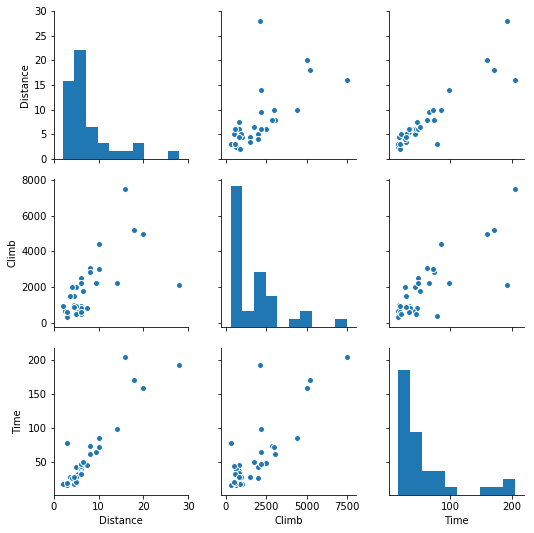

In [3]:
sns.pairplot(races_table, vars=["Distance", "Climb", "Time"])
plt.show()

Let's look at our multiple regression model.

In [4]:
races_lm = smf.ols('Time ~ Distance + Climb', data=races_table).fit()
races_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     181.7
Date:                Wed, 28 Feb 2018   Prob (F-statistic):           3.40e-18
Time:                        20:47:51   Log-Likelihood:                -142.11
No. Observations:                  35   AIC:                             290.2
Df Residuals:                      32   BIC:                             294.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.9920      4.303     -2.090      0.045     -17.756      -0.228
Distance       6.2180      0.601     10.343      0.000       4.993       7.442
Climb          0.0110      0.002      5.387      0.000       0.007       0.015
==============================================================================
Omnibus:                       47.910   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.976
Skew:                           3.026   Prob(JB):                     1.56e-51
Kurtosis:                      14.127   Cond. No.                     4.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

But is this a good model? 

## Diagnostics

### What can go wrong?

-   Regression function can be wrong: maybe regression function should
    have some other form (see diagnostics for simple linear regression).
-   Model for the errors may be incorrect:

    -   may not be normally distributed.
    -   may not be independent.
    -   may not have the same variance.


-   Detecting problems is more *art* then *science*, i.e. we cannot
    *test* for all possible problems in a regression model.

## Diagnostics

-   Basic idea of diagnostic measures: if model is correct then
    residuals $e_i = Y_i -\widehat{Y}_i, 1 \leq i \leq n$ should look
    like a sample of (not quite independent) $N(0, \sigma^2)$ random
    variables.

# Standard diagnostic plots

There is a set of standard plots for `lm` that help us assess whether our assumptions are reasonable or not. Using `python` we have to plot all them manually. We will go through plotin some, but not too much, detail.

As we see below, there are some quantities which we need to define in order to read these plots. We will define these first.

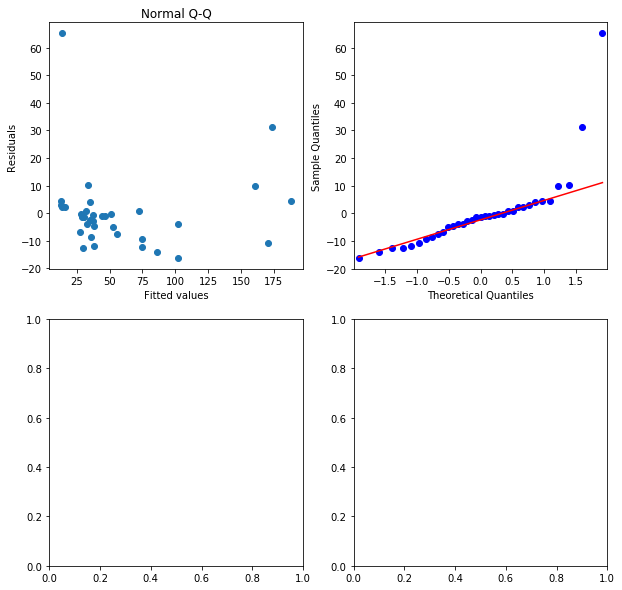

In [52]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)

#Residuals vs. Fitted
axs[0,0].scatter(races_lm.predict(), races_lm.resid)
axs[0,0].set_xlabel('Fitted values')
axs[0,0].set_ylabel('Residuals')
axs[0,0].set_title('Residuals vs. Fitted')

#Q-Q Plot
sm.qqplot(races_lm.resid,ax=axs[0,1],line='q')
axs[0,0].set_title('Normal Q-Q')

plt.show()